In [2]:
!pip install kneed

  Using cached kneed-0.8.1-py2.py3-none-any.whl (10 kB)


In [3]:
import os
from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm



#### Exercise ####


#### Please refer to module 2 of IntroToClustering - KMeans for Tasks 1-8
#### Task 1
##### Import the required packages.
##### Set the NumPy seed to 1234.
#### Result:


In [4]:
np.random.seed(1234)

#### Task 2
##### Set `main_dir` to the main folder.
##### Set `data_dir` to the path of the data directory.
##### Print `main_dir` and `data_dir`.


#### Result:


In [7]:
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data/"
print(data_dir)

/home/jovyan/TEDS-Jul2022
/home/jovyan/TEDS-Jul2022/data/


#### Task 3
##### Load the dataset `heart_failure_clinical_records_dataset.csv` and save it as `ex_df`.
##### Print the first few rows of `ex_df`.
#### Result:


In [8]:
ex_df = pd.read_csv(data_dir + 'heart_failure_clinical_records_dataset.csv')

#### Task 4


##### For clustering, we will be using just the  `['time', 'age', 'ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine']` columns. Drop all the other columns from `ex_df` and name the new dataset as `ex_df_cluster`. 


##### Print the first few rows of `ex_df_cluster` to make sure we have the correct dataset.


##### Check how many NAs are in each column and impute them with mean and check for NAs again.


#### Result:


In [9]:
col = ['time', 'age', 'ejection_fraction', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine']
ex_df_cluster = ex_df[col]

#### Task 5


##### In the dataset `ex_df_cluster`, check the data types for all of the columns. 
##### After making sure that all the data is numeric, scale the dataset and name it `ex_df_cluster_scaled`.
##### When the dataset is scaled, convert `ex_df_cluster_scaled` to a Pandas DataFrame named `ex_df_kmeans` and make sure to name the columns again. 


##### Print out the first few rows of `ex_df_kmeans` to make sure the column names are correct and are ready for clustering.


#### Result:


In [10]:
print(ex_df_cluster.isna().sum())
ex_df_cluster = ex_df_cluster.fillna(ex_df_cluster.mean())
print(ex_df_cluster.isna().sum())

time                        0
age                         0
ejection_fraction           0
creatinine_phosphokinase    0
platelets                   0
serum_sodium                0
serum_creatinine            0
dtype: int64
time                        0
age                         0
ejection_fraction           0
creatinine_phosphokinase    0
platelets                   0
serum_sodium                0
serum_creatinine            0
dtype: int64


In [11]:
ex_df_cluster = ex_df_cluster.select_dtypes([np.number])
ex_df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      299 non-null    int64  
 1   age                       299 non-null    float64
 2   ejection_fraction         299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   platelets                 299 non-null    float64
 5   serum_sodium              299 non-null    int64  
 6   serum_creatinine          299 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 16.5 KB


In [12]:
scaler = MinMaxScaler()
df_cluster_scaled = scaler.fit_transform(ex_df_cluster)


In [13]:
ex_df_kmeans = pd.DataFrame(df_cluster_scaled, columns = ex_df_cluster.columns)
ex_df_kmeans.head()


,time,age,ejection_fraction,creatinine_phosphokinase,platelets,serum_sodium,serum_creatinine
0,0.000000,0.636364,0.090909,0.071319,0.290823,0.485714,0.157303
1,0.007117,0.272727,0.363636,1.000000,0.288833,0.657143,0.067416
2,0.010676,0.454545,0.090909,0.015693,0.165960,0.457143,0.089888
3,0.010676,0.181818,0.090909,0.011227,0.224148,0.685714,0.157303
4,0.014235,0.454545,0.090909,0.017479,0.365984,0.085714,0.247191


#### Task 6


##### Plot the numeric variables from `ex_df_kmeans` to see their interactions. 


#### Result:


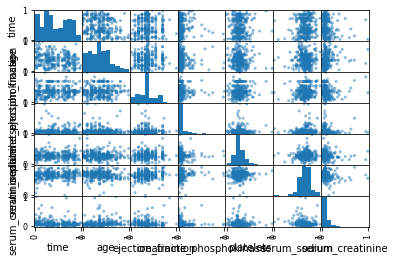

In [14]:
scatter_m = scatter_matrix(ex_df_kmeans)
plt.show()

#### Task 7


##### Let's first start with an arbitrary `k = 2`
##### Initialize the K-means with 2 clusters and name it `ex_kmeans_default`. 
##### Fit `ex_kmeans_default` with `ex_df_kmeans`. 
##### Predict the clusters with `ex_kmeans_default` and name the outputs as `ex_labels`. 
##### Get the cluster centers and name it as `ex_C_default`. 
##### Print `ex_C_default` to see what it looks like. 


#### Result:


In [15]:
k = 2
ex_kmeans_default = KMeans(n_clusters=k)
ex_kmeans_default = ex_kmeans_default.fit(ex_df_kmeans)
ex_labels = ex_kmeans_default.predict(ex_df_kmeans)
ex_C_default = ex_kmeans_default.cluster_centers_
print(ex_C_default)



[[0.72513651 0.33370354 0.36756882 0.06853478 0.28850668 0.68091603
  0.08671413]
 [0.23426114 0.41396104 0.36282468 0.07345396 0.28908678 0.67040816
  0.11113563]]


#### Task 8


##### Plot the data with clusters colored in and each centroid plotted.


#### Result:


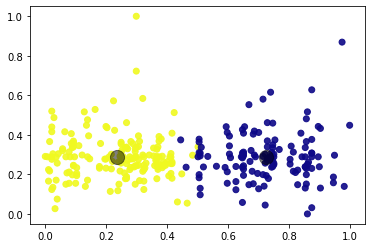

In [73]:
col_1 = 0
col_2 = 4

points = plt.scatter(ex_df_kmeans.iloc[:,col_1],
            ex_df_kmeans.iloc[:,col_2],
            c=ex_kmeans_default.labels_,
            cmap='plasma',
                    alpha = 0.9)


centroids = plt.scatter(ex_C_default[:, col_1],
            ex_C_default[:, col_2],
            c='black',
            s=200,
            alpha=0.5)

plt.show()

#### Please refer to module 3 of IntroToClustering - KMeans for Tasks 9-16
#### Task 9
##### Get the metrics we need for building an elbow plot, namely `ex_tot_withinss`, `ex_totss` and `ex_betweenss`.
##### The range for ex_K should be from 1 to 10.  


#### Result:


In [74]:
ex_K_MAX = 10
ex_KK = range(1,ex_K_MAX+1)


ex_KM = [kmeans(ex_df_kmeans,k) for k in ex_KK ]


ex_centroids = [cent for (cent,var) in ex_KM]


In [75]:
ex_D_k = [cdist(ex_df_kmeans, cent, 'euclidean') for cent in ex_centroids]
ex_cIdx = [np.argmin(D,axis=1) for D in ex_D_k]
ex_dist = [np.min(D,axis=1) for D in ex_D_k]

ex_tot_withinss = [sum(d**2) for d in ex_dist]              
ex_totss = sum(pdist(ex_df_kmeans)**2)/ex_df_kmeans.shape[0]   
ex_betweenss = ex_totss - ex_tot_withinss                      



#### Task 10


##### Build an elbow curve plot for KMeans clustering.
##### Observe the plot to try to identify the optimal K.


#### Result:


Text(0.5, 1.0, 'Elbow for KMeans clustering')

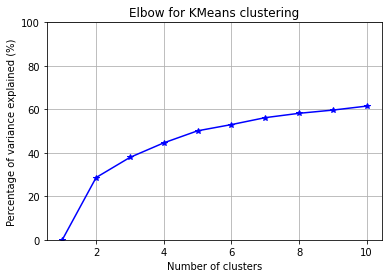

In [76]:
clr = cm.Spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# Elbow curve - explained variance.
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ex_KK, ex_betweenss/ex_totss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')




#### Task 11


##### Using the `KneeLocator` package, find the knee point `ex_elbow_cluster`


#### Result:


3


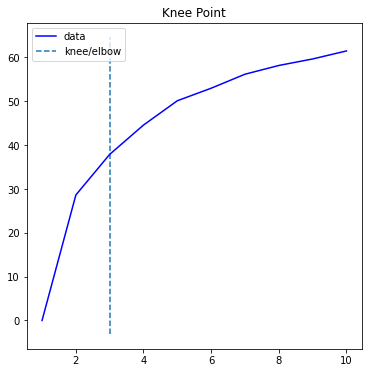

In [77]:
ex_kl = KneeLocator(x = ex_KK, y = ex_betweenss/ex_totss*100,
                 curve='concave', 
                 direction='increasing', 
                 S=1)
                
ex_kl.plot_knee()
ex_elbow_cluster = ex_kl.knee
print(ex_elbow_cluster)




#### Task 12


##### Now try the silhouette method to find the optimal number of `k` and name it `ex_sil_cluster`.


#### Result:


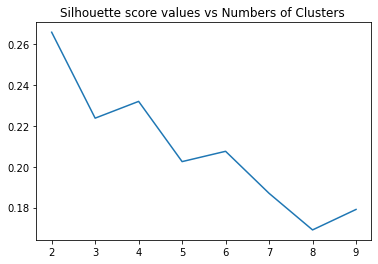

Optimal number of components is: 2


In [78]:
obs = ex_df_kmeans
ex_silhouette_score_values=list()
 
ex_NumberOfClusters = range(2,ex_K_MAX)
 
for i in ex_NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, 
                              max_iter=300, 
                              tol=0.0001, 
                              verbose=0, 
                              random_state=None, 
                              copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None)
    
    ex_silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,
                                                                       labels,
                                                                       metric='euclidean', 
                                                                       sample_size=None, 
                                                                       random_state=None))
 

plt.plot(ex_NumberOfClusters, ex_silhouette_score_values)

plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()     
 
ex_sil_cluster=ex_NumberOfClusters[ex_silhouette_score_values.index(max(ex_silhouette_score_values))]


print("Optimal number of components is:", ex_sil_cluster)




#### Task 12


##### Print the explained variance for both k = 2 and the optimal k and compare.


#### Result:


In [79]:
print(ex_betweenss[k - 1]/ex_totss * 100)

print(ex_betweenss[ex_sil_cluster - 1]/ex_totss * 100)





28.63123029653029
28.63123029653029


#### Task 13


##### Use the larger of the optimum k from the elbow plot and the silhouette plot to be `ex_optimal_clusters`
##### Initiate a new K-means cluster classifier and name it `ex_kmeans_optimal`, with K being the optimal number of clusters.
##### Fit `ex_kmeans_optimal` and use the model to predict clusters and store them in a list called `ex_labels`. 


#### Result:


In [80]:
ex_optimal_clusters = max(ex_elbow_cluster, ex_sil_cluster)

print(ex_optimal_clusters)

ex_kmeans_optimal = KMeans(n_clusters = ex_optimal_clusters)
ex_kmeans_optimal = ex_kmeans_optimal.fit(ex_df_kmeans)
ex_labels = ex_kmeans_optimal.predict(ex_df_kmeans)
ex_C_optimal = ex_kmeans_optimal.cluster_centers_




3


#### Task 14


##### Plot a scatter plot with the optimal number of clusters shown in different colors.
##### Plot the optimized centroids over the clusters.


#### Result:


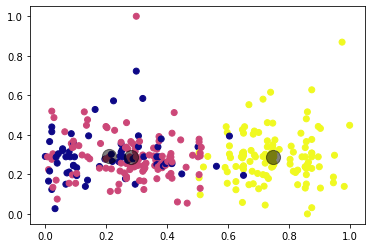

In [81]:
plt.scatter(ex_df_kmeans.iloc[:,col_1],            
            ex_df_kmeans.iloc[:,col_2], 
            c = ex_kmeans_optimal.labels_, 
            cmap = 'plasma')


plt.scatter(ex_C_optimal[:, col_1], 
            ex_C_optimal[:, col_2], 
            c = 'black', 
            s = 200, 
            alpha = 0.5)

plt.show()




#### Task 15


##### Create a new dataframe named `ex_clustered_df` and populate with all the columns from `ex_cluster_scaled`. 
##### Append the list of predicted cluster, `ex_labels`, to the `ex_clustered_df` dataframe. 
##### Print the `ex_clustered_df` dataframe to inspect the clusters.


#### Result:


In [82]:
ex_clustered_df = ex_df_cluster 
ex_clustered_df['clusters'] = pd.Series(ex_labels)

print(ex_clustered_df.head(20))
ex_clustered_df.groupby('clusters').count()['time']



    time   age  ejection_fraction  creatinine_phosphokinase  platelets  \
0      4  75.0                 20                       582  265000.00   
1      6  55.0                 38                      7861  263358.03   
2      7  65.0                 20                       146  162000.00   
3      7  50.0                 20                       111  210000.00   
4      8  65.0                 20                       160  327000.00   
5      8  90.0                 40                        47  204000.00   
6     10  75.0                 15                       246  127000.00   
7     10  60.0                 60                       315  454000.00   
8     10  65.0                 65                       157  263358.03   
9     10  80.0                 35                       123  388000.00   
10    10  75.0                 38                        81  368000.00   
11    10  62.0                 25                       231  253000.00   
12    11  45.0                 30     

clusters
0     64
1    117
2    118
Name: time, dtype: int64

#### Task 16


##### Group the `ex_clustered_df` dataframe by `cluster` to see the group mean of each variable.
##### Name the new dataframe as `ex_cluster_groups_means`. 
##### Print `ex_cluster_groups_means` to inspect each clusters.


#### Result:


In [83]:
ex_cluster_groups_means = ex_clustered_df.groupby('clusters').mean()
print(ex_cluster_groups_means)



                time        age  ejection_fraction  creatinine_phosphokinase  \
clusters                                                                       
0          62.734375  76.000000          36.718750                489.781250   
1          82.683761  55.034188          38.982906                675.504274   
2         214.059322  58.358763          37.932203                538.898305   

              platelets  serum_sodium  serum_creatinine  
clusters                                                 
0         268294.753750    135.343750          1.715625  
1         260836.446496    137.213675          1.330513  
2         263180.697203    136.737288          1.282203  


#### Please refer to module 4 of IntroToClustering - KMeans for Tasks 17-18
#### Task 17
##### Now use Mini-Batch K-Means algorithm on the same `ex_df_kmeans` data.
##### Set `n_cluster` to 2, and `batch_size` to one third of total rows. (Make sure it's an integer) 


#### Result:


In [121]:
ex_batch_size = int(len(ex_df_kmeans)/3)
ex_mbkm = MiniBatchKMeans(n_clusters=3, batch_size=ex_batch_size)

ex_mbkm = ex_mbkm.fit(ex_df_kmeans)

ex_mbkm_labels = ex_mbkm.predict(ex_df_kmeans)

ex_mbkm_C = ex_mbkm.cluster_centers_
print(ex_mbkm_C)




[[0.23154262 0.31643175 0.36513417 0.07494864 0.28310503 0.67637877
  0.09992751]
 [0.37093027 0.67870023 0.38526797 0.0634491  0.29091701 0.66682409
  0.12606324]
 [0.72755351 0.26703131 0.35279758 0.07453827 0.29955444 0.68510051
  0.07959787]]


#### Task 18


##### Plot the Mini-Batch K-means cluster and the centroids.


#### Result:


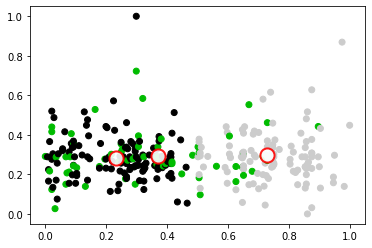

In [136]:
plt.scatter(ex_df_kmeans.iloc[:,col_1], ex_df_kmeans.iloc[:,col_2], c=ex_mbkm.labels_, cmap='nipy_spectral')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(ex_mbkm_C[:, col_1], ex_mbkm_C[:, col_2], c='white', s=200, alpha=0.9,
            edgecolors='red',linewidth=2)




#### Bonus Task 1


##### Try to plot both algorithms on the same plot and plot their differences.
##### Make necessary changes.
##### Use the following colors: ['#4EACC5', '#FF9C34','#c5674e', '#4E9A06']


#### Result:


0 : #4EACC5
1 : #FF9C34


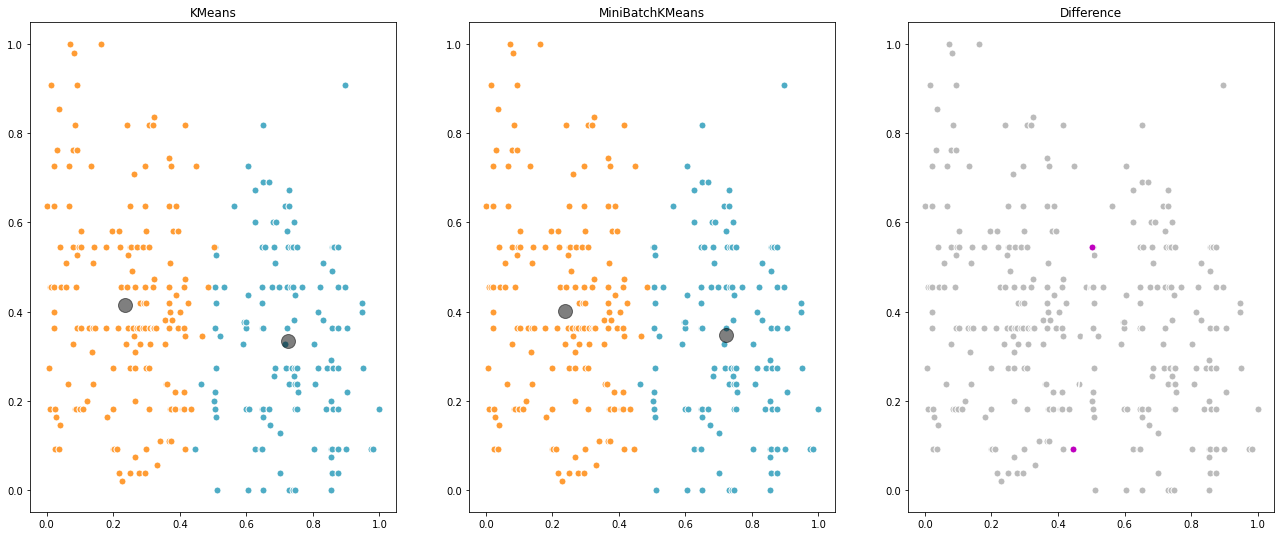

In [120]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

n_clusters = 2

X = np.array(ex_df_kmeans)
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34','#c5674e', '#4E9A06']

ex_k_means_cluster_centers = ex_kmeans_default.cluster_centers_
order = pairwise_distances_argmin(ex_kmeans_default.cluster_centers_, ex_mbkm.cluster_centers_)
ex_mbkm_cluster_centers = ex_mbkm.cluster_centers_[order]

ex_k_means_labels = pairwise_distances_argmin(ex_df_kmeans, ex_k_means_cluster_centers)
ex_mbkm_labels = pairwise_distances_argmin(ex_df_kmeans, ex_mbkm_cluster_centers)

for k, col in zip(range(n_clusters), colors):
    print(k, ':', col)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = ex_k_means_labels == k
    cluster_center = ex_k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=14)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k', alpha=0.5,
            markeredgecolor='k', markersize=14)
ax.set_title('KMeans')

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = ex_mbkm_labels == k
    cluster_center = ex_mbkm_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize=14)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k',alpha=0.5,
            markeredgecolor='k', markersize=14)
ax.set_title('MiniBatchKMeans')

# Initialise the different array to all False
different = (ex_mbkm_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((ex_k_means_labels == k) != (ex_mbkm_labels == k))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.',markersize=14)
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.',markersize=14)
ax.set_title('Difference')

plt.show()






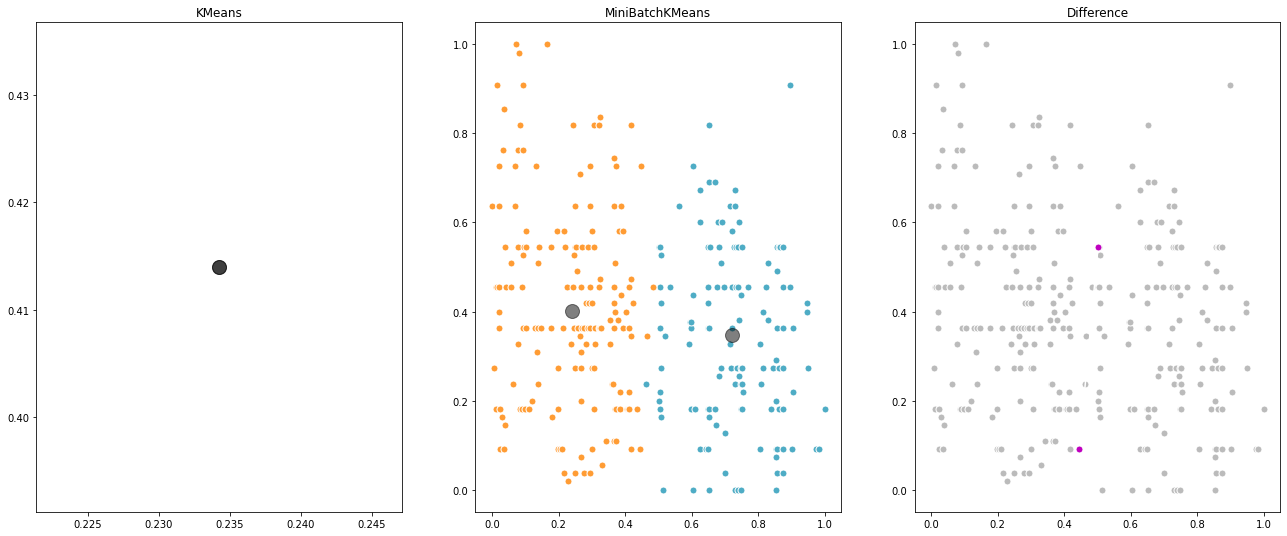

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

n_clusters = 2

X = np.array(ex_df_kmeans)
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34','#c5674e', '#4E9A06']

ex_k_means_cluster_centers = ex_kmeans_default.cluster_centers_
order = pairwise_distances_argmin(ex_kmeans_default.cluster_centers_, ex_mbkm.cluster_centers_)
ex_mbkm_cluster_centers = ex_mbkm.cluster_centers_[order]

ex_k_means_labels = pairwise_distances_argmin(ex_df_kmeans, ex_k_means_cluster_centers)
ex_mbkm_labels = pairwise_distances_argmin(ex_df_kmeans, ex_mbkm_cluster_centers)


# KMeans
ax = fig.add_subplot(1, 3, 1)
for x in zip(range(n_clusters), colors):
    
    my_members = ex_k_means_labels == x.index
    cluster_center = ex_k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=14)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k', alpha=0.5,
            markeredgecolor='k', markersize=14)
ax.set_title('KMeans')

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = ex_mbkm_labels == k
    cluster_center = ex_mbkm_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize=14)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k',alpha=0.5,
            markeredgecolor='k', markersize=14)
ax.set_title('MiniBatchKMeans')

# Initialise the different array to all False
different = (ex_mbkm_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((ex_k_means_labels == k) != (ex_mbkm_labels == k))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.',markersize=14)
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.',markersize=14)
ax.set_title('Difference')

plt.show()







In [ ]:
for x in colors:
    print(colors.index)

0
1
2
3
